In [1]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dir = os.getcwd()
# go one level higher and add it to path
parent_dir = str(Path(dir).parents[0])
sys.path.append(parent_dir)

from src.config import AUDIO_DIR
from src.data.data_utils import load
from src.features.features import get_features

pd.set_option('display.max_columns', 52)

## Feature extraction

In [2]:
try:
    features = pd.read_csv('../data/interim/features.csv', index_col=0, header=[0, 1, 2])
except:
    get_features('small')


In [3]:
features = features.dropna()
features.shape

(7951, 518)

In [4]:
features

feature    chroma_cens                                                     \
statistics    kurtosis                                                      
number              01        02        03        04        05         06   
track_id                                                                    
2            -0.217359 -0.726509 -0.491446 -0.721771 -0.545604   0.903521   
5            -0.575293 -0.460787 -1.310206 -0.371414 -0.279014  -0.456130   
10           -0.170648 -0.662701  0.334679 -0.269012 -0.633766  -0.800806   
140          -0.286780  1.582875  0.664635  0.370429 -0.525093  -1.094748   
141           0.337887 -0.320074 -0.225522 -0.831719 -0.411882  -1.212733   
...                ...       ...       ...       ...       ...        ...   
154308       -1.053601  0.060788  1.704757 -0.777857  0.558388  -0.662202   
154309        2.169788 -1.155132 -0.303650 -1.045133 -1.208173  -0.825725   
154413       -1.219351 -1.417390  0.208791  4.801033 -0.561867   3.271480   
154414       -0.239980 -0.642887  1.149441 -0.793276 -1.293259  -1.022434   
155066        1.009953 -0.091882 -1.310494 -1.732816 -1.094380  20.023039   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.786983  0.917156 -0.793144  0.452647 -0.229356 -0.173608   
5          -0.788048  0.126617 -0.816839  3.057143  0.065180  2.229395   
10         -0.514046 -0.019774 -0.477296 -0.710341 -0.347353 -0.336416   
140         0.839174 -0.202234 -0.432132 -1.217938 -0.682920 -0.605614   
141        -0.553260 -0.743021  0.849655  0.155225 -0.050075  0.660437   
...              ...       ...       ...       ...       ...       ...   
154308     -1.358890 -0.714282 -1.047748  2.689562 -1.196743  2.795735   
154309     -0.481393  6.507251  0.381729  1.691741  2.469630  1.070482   
154413      5.800009  9.027393 -1.526886  1.665599 -0.886765  3.377588   
154414     -1.177673  1.347859 -0.231648 -0.943169 -0.604957  1.652884   
155066      9.381350  0.520161 -0.901654  0.246841  0.411799  5.859467   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
2           0.731929  0.564340  0.509567  0.539360  0.799817  0.504063   
5           0.503388  0.507648  0.693599  0.569417  0.537767  0.622475   
10          0.413630  0.472618  0.667295  0.654727  0.442657  0.415954   
140         0.521293  0.862354  0.590986  0.683515  0.608712  0.654876   
141         0.519412  0.429041  0.616609  0.877509  0.498666  0.873961   
...              ...       ...       ...       ...       ...       ...   
154308      0.458248  0.612681  0.972323  1.000000  0.859181  0.566026   
154309      0.824763  0.821103  0.886571  0.476689  0.514607  0.658231   
154413      0.896096  0.882674  0.870927  0.940653  0.940773  0.888128   
154414      0.621285  0.680503  0.691272  0.731936  0.770049  0.721503   
155066      0.269397  0.969931  0.970135  0.861873  0.571166  0.728939   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
2           0.563302  0.427014  0.529112  0.422337  0.501536  0.506892   
5           0.526745  0.844188  0.546589  0.513516  0.325426  0.529823   
10          0.509747  0.336658  0.499810  0.456472  0.474244  0.352999   
140         0.740992  0.684725  0.793263  0.802711  0.814004  0.769616   
141         0.729198  0.654637

In [5]:
targets = pd.read_csv('../data/fma_metadata/tracks.csv', index_col=0, header=[0, 1, 2]).loc[features.index, ('track', 'genre_top')]

In [6]:
targets.columns = ['genre']

In [7]:
targets

,genre
track_id,
2,Hip-Hop
5,Hip-Hop
10,Pop
140,Folk
141,Folk
...,...
154308,Hip-Hop
154309,Hip-Hop
154413,Pop


In [8]:
targets['genre'].value_counts()

genre
Folk             999
Pop              998
Rock             997
International    997
Hip-Hop          996
Instrumental     993
Electronic       991
Experimental     980
Name: count, dtype: int64

## Train-Val-Test split

In [9]:
split = pd.read_csv('../data/fma_metadata/tracks.csv', index_col=0, header=[0, 1]).loc[features.index, ('set','split')]

In [10]:
split[split == 'training'].count(), split[split == 'validation'].count(), split[split == 'test'].count()

(6360, 793, 798)

In [11]:
X_train, y_train = features.loc[split[split == 'training'].index], targets.loc[split[split == 'training'].index]

In [12]:
X_val, y_val = features.loc[split[split == 'validation'].index], targets.loc[split[split == 'validation'].index]

In [13]:
X_test, y_test = features.loc[split[split == 'test'].index], targets.loc[split[split == 'test'].index]

In [14]:
X_train_full, y_train_full = pd.concat((X_train, X_val)), pd.concat((y_train, y_val))

## Models training

Идеи по улучшению качества предсказаний:
- Использование bagging, добавить еще несколько деревянных моделей, попробовать векторные модели как дополнительную опцию
- Попробовать stacking на разных финальных алгоритмах - нейронка или катбуст
- Добавить а-ля бутстрапирование выборки при обучении
- Оптимизировать loss-функции при обучении, отказаться от акураси
- Более крупные модели, обученные на трейн+вал

### Imports

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import torch
import torch.nn as nn
import torch.optim as optim

import pickle

### Logistic Regression

In [16]:
logreg_model = LogisticRegression(max_iter=100000, solver='newton-cholesky')

In [17]:
if os.path.exists('../models/logreg_model.pkl'):
    with open('../models/logreg_model.pkl', 'rb') as file:
        logreg_model = pickle.load(file)
else:
    logreg_model.fit(X_train_full, y_train_full)
    with open('../models/logreg_model.pkl', 'wb') as file:
        print('Saving model')
        pickle.dump(logreg_model, file)
        print('Done')

In [18]:
accuracy_logreg = accuracy_score(y_test, logreg_model.predict(X_test))

In [19]:
f1_logreg = f1_score(y_test, logreg_model.predict(X_test), average='macro')

In [20]:
print(f'Accuracy: {accuracy_logreg:.4f}')
print(f'F1: {f1_logreg:.4f}')

Accuracy: 0.4123
F1: 0.4069


### CatBoost Classifier

In [21]:
cboost_model = CatBoostClassifier(iterations=1500, depth=8, learning_rate=0.02) #iterations=3000, depth=16, learning_rate=0.02, early_stopping_rounds=100

In [22]:
if os.path.exists('../models/cboost_model.pkl'):
    with open('../models/cboost_model.pkl', 'rb') as file:
        cboost_model = pickle.load(file)
else:
    cboost_model.fit(X_train_full, y_train_full, verbose=300)
    with open('../models/cboost_model.pkl', 'wb') as file:
        pickle.dump(cboost_model, file)

In [23]:
accuracy_cb = accuracy_score(y_test, cboost_model.predict(X_test))

In [24]:
f1_cb = f1_score(y_test, cboost_model.predict(X_test), average='macro')

In [25]:
print(f'Accuracy: {accuracy_cb:.4f}')
print(f'F1: {f1_cb:.4f}')

Accuracy: 0.4298
F1: 0.4272


### CBoost result evaluation

In [26]:
flat_index = []

for idx in X_train.columns:
    flat = idx[0] + '_' + idx[1] + '_' + idx[2]
    flat_index.append(flat)

In [27]:
importances = pd.DataFrame({'feature_name': flat_index, 'rating': cboost_model.feature_importances_}).sort_values(by='rating', ascending=False)

In [28]:
importances[importances['rating'] > 0.4].T

,272,275,352,398,430,294,435,273,314,428,448,334,436,403,252,336,277,353,455,255,412,375,516,511,393,292,377,458,354,438,461,394,464,397,396,437,332,143,427,429,450,405,445,312,413,444,409,440,355
feature_name,mfcc_max_01,mfcc_max_04,mfcc_skew_01,rmse_std_01,spectral_contrast_mean_04,mfcc_mean_03,spectral_contrast_median_02,mfcc_max_02,mfcc_median_03,spectral_contrast_mean_02,spectral_contrast_skew_01,mfcc_min_03,spectral_contrast_median_03,spectral_bandwidth_min_01,mfcc_kurtosis_01,mfcc_min_05,mfcc_max_06,mfcc_skew_02,spectral_contrast_std_01,mfcc_kurtosis_04,spectral_centroid_std_01,mfcc_std_04,zcr_skew_01,zcr_kurtosis_01,rmse_max_01,mfcc_mean_01,mfcc_std_06,spectral_contrast_std_04,mfcc_skew_03,spectral_contrast_median_05,spectral_contrast_std_07,rmse_mean_01,spectral_rolloff_mean_01,rmse_skew_01,rmse_min_01,spectral_contrast_median_04,mfcc_min_01,chroma_cqt_min_12,spectral_contrast_mean_01,spectral_contrast_mean_03,spectral_contrast_skew_03,spectral_bandwidth_std_01,spectral_contrast_min_05,mfcc_median_01,spectral_contrast_kurtosis_01,spectral_contrast_min_04,spectral_centroid_median_01,spectral_contrast_median_07,mfcc_skew_04
rating,1.976646,1.80475,0.975134,0.974901,0.910186,0.857076,0.856512,0.805756,0.791842,0.701494,0.679844,0.669219,0.655755,0.651396,0.634062,0.632167,0.628937,0.627075,0.619455,0.612689,0.604578,0.600408,0.598734,0.583503,0.582948,0.571041,0.557386,0.542356,0.541905,0.529599,0.524709,0.520843,0.519121,0.502319,0.500776,0.50019,0.496515,0.496162,0.462699,0.447006,0.444798,0.434155,0.432589,0.421167,0.421028,0.419907,0.416201,0.408534,0.406332


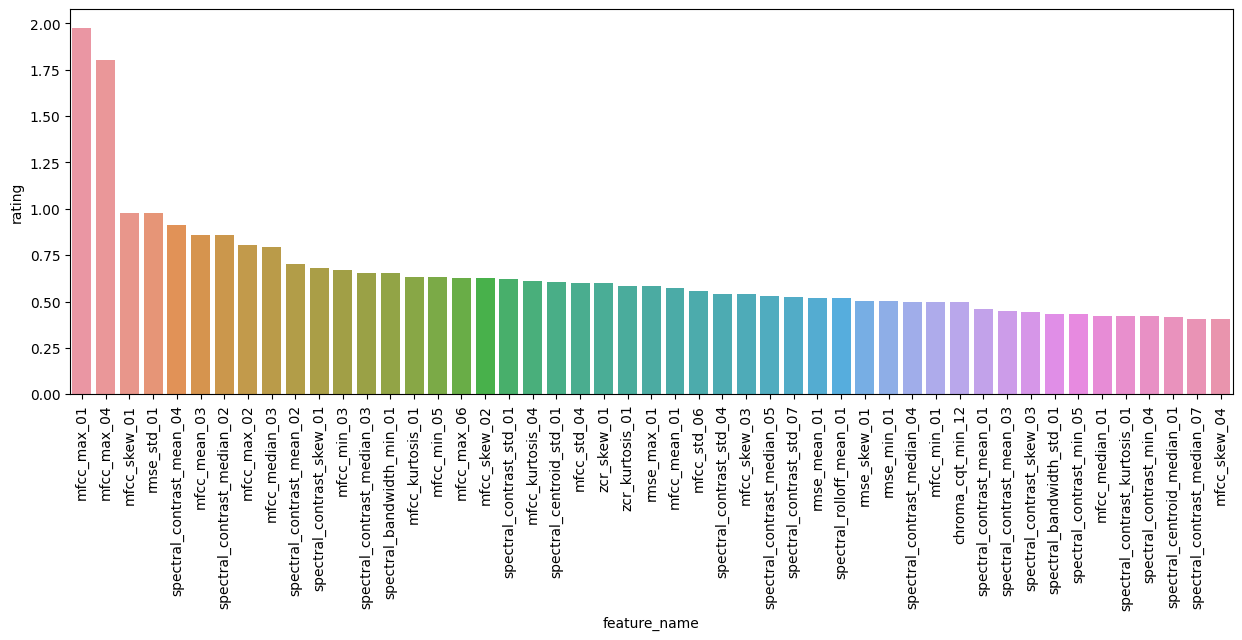

In [29]:
plt.figure(figsize=(15, 5))
sns.barplot(x=importances.loc[importances['rating'] > 0.4, 'feature_name'], y=importances.loc[importances['rating'] > 0.4, 'rating'])
plt.xticks(rotation=90);

### LightGBM Classifier

In [30]:
lgbm_model = LGBMClassifier(n_estimators=150, max_depth=12, learning_rate=0.05, n_jobs=4)

In [31]:
if os.path.exists('../models/lgbm_model.pkl'):
    with open('../models/lgbm_model.pkl', 'rb') as file:
        lgbm_model = pickle.load(file)
else:
    lgbm_model.fit(X_train_full.values, y_train_full.values)
    with open('../models/lgbm_model.pkl', 'wb') as file:
        pickle.dump(lgbm_model, file)

In [32]:
accuracy_lgbm = accuracy_score(y_test, lgbm_model.predict(X_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [33]:
f1_lgbm = f1_score(y_test, lgbm_model.predict(X_test), average='macro')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [34]:
print(f'Accuracy: {accuracy_lgbm:.4f}')
print(f'F1: {f1_lgbm:.4f}')

Accuracy: 0.4110
F1: 0.4110


### XGboost Classifier

In [35]:
xgb_model = XGBClassifier(n_estimators=150, max_depth=16, learning_rate=0.05, n_jobs=4)

In [36]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_full)

c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
if os.path.exists('../models/xgb_model.pkl'):
    with open('../models/xgb_model.pkl', 'rb') as file:
        xgb_model = pickle.load(file)
else:
    xgb_model.fit(X_train_full, y_train_encoded)
    with open('../models/xgb_model.pkl', 'wb') as file:
        pickle.dump(xgb_model, file)

In [38]:
accuracy_xgb = accuracy_score(label_encoder.transform(y_test), xgb_model.predict(X_test))

c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [39]:
f1_xgb = f1_score(label_encoder.transform(y_test), xgb_model.predict(X_test), average='macro')

c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [40]:
print(f'Accuracy: {accuracy_xgb:.4f}')
print(f'F1: {f1_xgb:.4f}')

Accuracy: 0.3897
F1: 0.3867


### NeuralNetwork/PyTorch

In [41]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dims[2], hidden_dims[3])
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dims[3], output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.softmax(x)
        return x

In [42]:
input_dim = X_train.shape[1] 
hidden_dims = [512, 256, 128, 32]
output_dim = len(y_train['genre'].unique())

nn_model = SimpleNN(input_dim, hidden_dims, output_dim)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(nn_model.parameters(), lr=0.0001, weight_decay=0.01)

In [43]:
if os.path.exists('../models/nn_model.pkl'):
    with open('../models/nn_model.pkl', 'rb') as file:
        nn_model = pickle.load(file)
else:
    num_epochs = 15000
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)

    X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
    y_val_encoded = label_encoder.transform(y_val)

    for epoch in range(num_epochs):
        inputs = torch.tensor(X_train.values, dtype=torch.float32)
        labels = torch.tensor(y_train_encoded, dtype=torch.long)
        
        optimizer.zero_grad()

        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)

        l2_reg = 0.0
        for param in nn_model.parameters():
            l2_reg += torch.sum(param ** 2)
        loss += optimizer.param_groups[0]['weight_decay'] * l2_reg

        loss.backward()
        optimizer.step()

        if (epoch + 1) % 300 == 0 or epoch == num_epochs - 1 or epoch == 0:
            with torch.no_grad():
                nn_model.eval()
                y_pred = nn_model(X_val_tensor)
                y_pred_classes = torch.argmax(y_pred, dim=1).numpy()
                val_accuracy = accuracy_score(y_val_encoded, y_pred_classes)
                val_f1_score = f1_score(y_val_encoded, y_pred_classes, average='weighted')
                nn_model.train()
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {val_accuracy}, F1: {val_f1_score}')

    with open('../models/nn_model.pkl', 'wb') as file:
        pickle.dump(nn_model, file)


In [44]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

with torch.no_grad():
    nn_model.eval()
    y_pred = nn_model(X_test_tensor)

y_pred_classes = torch.argmax(y_pred, dim=1).numpy()

y_test_encoded = label_encoder.transform(y_test)
accuracy_nn = accuracy_score(y_test_encoded, y_pred_classes)
f1_nn = f1_score(y_test_encoded, y_pred_classes, average='macro')
print(f'Accuracy: {accuracy_nn:.4f}')
print(f'F1: {f1_nn:.4f}')

Accuracy: 0.3434
F1: 0.2820


c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


### Dummy Classifier

In [63]:
dummy_model = DummyClassifier(strategy='stratified')

dummy_model.fit(X_train_full, y_train_full);

In [64]:
accuracy_dummy = accuracy_score(y_test, dummy_model.predict(X_test))

In [65]:
f1_dummy = f1_score(y_test, dummy_model.predict(X_test), average='macro')

In [66]:
print(f'Accuracy: {accuracy_dummy:.4f}')
print(f'F1: {f1_dummy:.4f}')

Accuracy: 0.1278
F1: 0.1189


### Interim results

In [67]:
results = pd.DataFrame({'Accuracy':[accuracy_logreg, accuracy_cb, accuracy_nn, accuracy_lgbm, accuracy_xgb, accuracy_dummy],
                        'F1':[f1_logreg, f1_cb, f1_nn, f1_lgbm, f1_xgb, f1_dummy]}, index=['logreg', 'cboost', 'neuralnet', 'lgbm', 'xgb', 'dummy'])

In [68]:
results

,Accuracy,F1
logreg,0.412281,0.406908
cboost,0.429825,0.427248
neuralnet,0.343358,0.282044
lgbm,0.411028,0.410995
xgb,0.389724,0.386740
dummy,0.127820,0.118877


### Bagging

In [47]:
logreg_test_preds = label_encoder.transform(logreg_model.predict(X_test))

In [48]:
cboost_test_preds = label_encoder.transform(cboost_model.predict(X_test))

c:\workspace\pocket_dj\.venv\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [49]:
lgbm_test_preds = label_encoder.transform(lgbm_model.predict(X_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [50]:
xgb_test_preds = xgb_model.predict(X_test)

In [51]:
nn_test_preds = y_pred_classes

In [52]:
test_preds_df = pd.DataFrame({'logreg': logreg_test_preds, 'cboost': cboost_test_preds, 'lgbm': lgbm_test_preds, 'xgb': xgb_test_preds, 'nn': nn_test_preds})

In [53]:
bagging_preds = test_preds_df.mode(axis=1)[0]

In [54]:
bagging_preds

0      7.0
1      0.0
2      3.0
3      3.0
4      7.0
      ... 
793    4.0
794    0.0
795    3.0
796    6.0
797    0.0
Name: 0, Length: 798, dtype: float64

In [55]:
accuracy_bag = accuracy_score(y_test_encoded, bagging_preds)
f1_bag = f1_score(y_test_encoded, bagging_preds, average='macro')
print(f'Accuracy: {accuracy_bag:.4f}')
print(f'F1: {f1_bag:.4f}')

Accuracy: 0.4223
F1: 0.4190


In [56]:
test_preds_df_2 = pd.DataFrame({'cboost': cboost_test_preds, 'lgbm': lgbm_test_preds, 'xgb': xgb_test_preds})

In [57]:
bagging_preds_2 = test_preds_df_2.mode(axis=1)[0]

In [58]:
accuracy_bag_2 = accuracy_score(y_test_encoded, bagging_preds_2)
f1_bag_2 = f1_score(y_test_encoded, bagging_preds_2, average='macro')
print(f'Accuracy: {accuracy_bag_2:.4f}')
print(f'F1: {f1_bag_2:.4f}')

Accuracy: 0.4123
F1: 0.4119
